In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)

In [3]:
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

### Read the data and rename columns 

In [4]:
df = pd.read_excel("images_data.xlsx")

In [5]:
df.columns

Index(['Timestamp', 'Score', 'Your Age ', 'Your gender',
       'Your education level (finished)', 'Your country of origin',
       'Have you ever worked on/studied AI?',
       'Have you passed similar kinds of test before?',
       'Is this person real? ',
       'In your opinion, how many people will say that it is a real person? [I say: ]',
       'Is this person real?  ',
       'In your opinion, how many people will say that it is a real person? [I say:]',
       'Is this person real?  .1',
       'In your opinion, how many people will say that it is a real person? [I say:].1',
       'Is this person real?  .2',
       'In your opinion, how many people will say that it is a real person? [I say:].2',
       'Which person is real?  ',
       'In your opinion, how many people will say that the left one person is real and the right one image is generated by AI? [I say:]',
       ' Which person is real?  ',
       'In your opinion, how many people will say that the left one person is 

In [6]:
len(df.columns)

40

In [7]:
column_names = ['ts', 'score', 'age', 'gender', 'education', 'country', 'know_ai', 'similar_tests']

In [8]:
wc_columns = []
for i in range(1,17):
    column_names.append("q" + str(i))
    column_names.append("wc" + str(i))
    wc_columns.append("wc" + str(i))

In [9]:
df.columns = column_names

In [10]:
#q1-q8: people questions
#q9-q16: modern art questions
df

,ts,score,age,gender,education,country,know_ai,similar_tests,q1,wc1,...,q12,wc12,q13,wc13,q14,wc14,q15,wc15,q16,wc16
0,2019-12-23 14:06:54.633,13,26,M,Bachelor's,Ethiopia,No,No,Probably yes,0.7,...,Probably no,0.1,Definitely right one,0.1,Probably left one,0.6,Probably right one,0.3,Definitely right one,0.1
1,2019-12-23 14:32:50.361,11,27,M,Master's,Georgia,Yes,No,Probably no,0.4,...,Probably yes,0.7,Probably right one,0.3,Definitely left one,0.9,Probably left one,0.6,Probably right one,0.4
2,2019-12-23 14:33:27.483,12,45,M,High school,Ukraine,No,No,Probably no,0.3,...,Probably no,0.4,Definitely right one,0.8,Probably right one,0.8,Definitely left one,0.7,Definitely right one,0.2
3,2019-12-23 15:16:33.222,12,30,M,Master's,Russia,Yes,No,Probably no,0.9,...,Probably no,0.5,Probably right one,0.8,Probably left one,0.2,Definitely left one,0.7,Probably left one,0.2
4,2019-12-23 15:42:37.878,13,24,F,Master's,Russia,Yes,Yes,Probably yes,0.3,...,Probably no,0.2,Probably right one,0.3,Probably left one,0.2,Probably left one,0.2,Definitely right one,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-01-13 22:30:52.468,8,49,Other,PhD,Estonia,No,No,I don't know,0.7,...,Probably yes,0.6,Probably left one,0.3,Probably right one,0.6,Definitely left one,0.8,Probably right one,0.3
199,2020-01-14 10:09:20.826,12,36,M,High school,Estonia,No,Yes,Definitely yes,0.9,...,Probably yes,0.3,Probably right one,0.4,Probably left one,0.7,Definitely left one,0.8,Probably right one,0.2
200,2020-01-14 11:05:40.258,13,26,M,Master's,Estonia,Yes,Yes,Probably yes,0.9,...,Probably no,0.5,Probably right one,0.3,Probably right one,0.4,Probably left one,0.8,Probably right one,0.3
201,2020-01-14 12:10:04.546,12,19,F,High school,Estonia,No,No,Definitely yes,0.9,...,Probably no,0.2,Probably right one,0.4,Probably right one,0.5,Probably left one,0.5,Probably right one,0.5


### Plots

#### 1. Time graph

In [11]:
df['date'] = df['ts'].dt.date

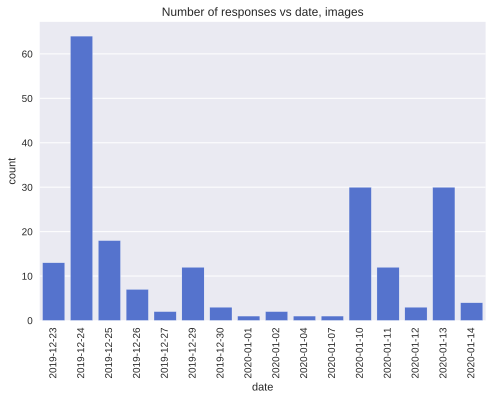

In [12]:
hist = sns.countplot(x = 'date',
              data = df,
              #order = df['date'].value_counts().index,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Number of responses vs date, images")
plt.show()

#### 2. Age distribution

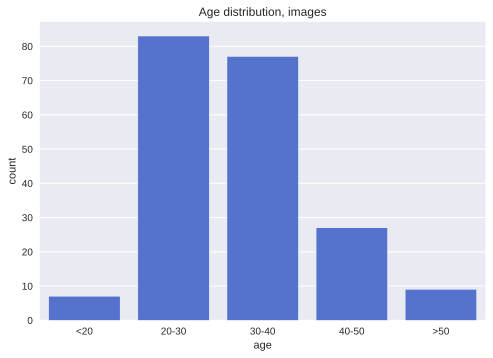

In [13]:
sns.countplot(pd.cut(df['age'],
                     bins=[0,20,30,40,50,100], 
                     labels=["<20","20-30","30-40","40-50",">50"]), 
              color="royalblue")
plt.title('Age distribution, images')
plt.show()

#### 3. Worked on/studied AI

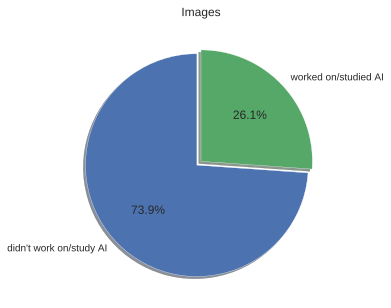

In [14]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['know_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Images")
plt.show()

#### 4. Passed similar tests before

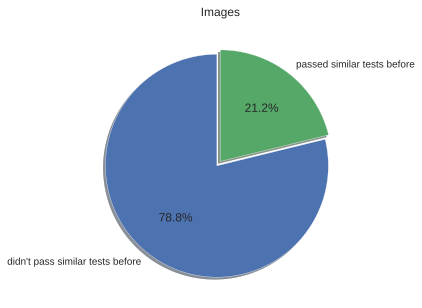

In [15]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['similar_tests'].value_counts(),explode=(0.05,0),labels=["didn't pass similar tests before","passed similar tests before"], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Images")
plt.show()

#### 5. Country of origin pie plot

In [16]:
temp_df = df['country'].value_counts()
temp_df2 = temp_df.head(4)
if len(temp_df) > 4:
    temp_df2['Others'.format(len(temp_df) - 4)] = sum(temp_df[4:])

In [17]:
temp_df2

Estonia    84
Russia     52
Finland     5
Ukraine     4
Others     58
Name: country, dtype: int64

In [18]:
list(temp_df2.index)

['Estonia', 'Russia', 'Finland', 'Ukraine', 'Others']

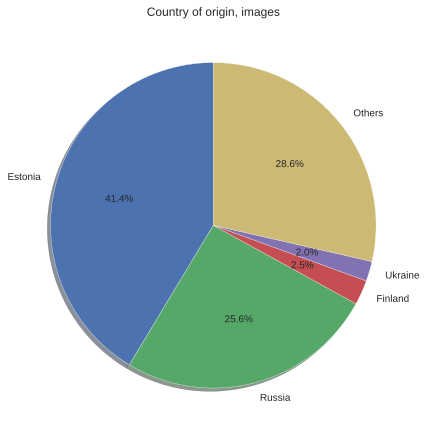

In [51]:
#country of origin pie plot
fig, ax = plt.subplots(figsize=(8,7.5))
ax.pie(temp_df2, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 10}, labels = list(temp_df2.index))
plt.title("Country of origin, images")
plt.show()

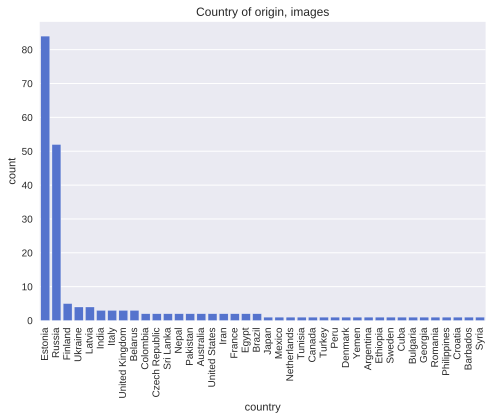

In [20]:
# country of origin historgam
hist = sns.countplot(x = 'country',
              data = df,
              order = df['country'].value_counts().index,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Country of origin, images")
plt.show()

#### 6. Scores distribution

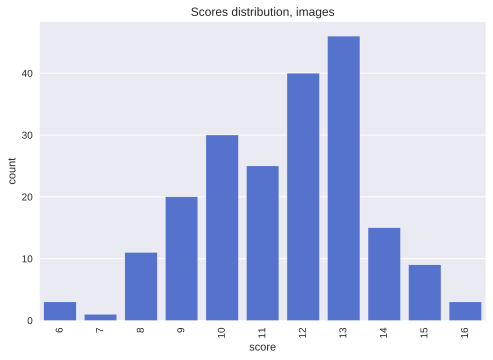

In [21]:
hist = sns.countplot(x = 'score',
              data = df,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution, images")
plt.show()

#### 7. Pople with maximum score

In [22]:
df_max = df[df['score'] == 16]

In [23]:
df_max[['ts', 'score', 'age', 'gender', 'education', 'country', 'know_ai', 'similar_tests']]

,ts,score,age,gender,education,country,know_ai,similar_tests
44,2019-12-24 11:58:13.407,16,29,M,Bachelor's,Russia,No,No
112,2019-12-29 14:21:15.140,16,31,F,Bachelor's,Russia,No,No
156,2020-01-11 02:20:50.055,16,39,M,High school,Estonia,No,Yes


******************

#### Map question columns into 0/1

In [24]:
#dictionaries for mapping

# q1, q4, q9, q11
d1 = {"Probably yes" : 1,
      "Definitely yes": 1,
      "I don't know": 0,
      "Probably no": 0,
      "Definitely no": 0}

#q2, q3, q10, q12
d2 = {"Probably yes" : 0,
      "Definitely yes": 0,
      "I don't know": 0,
      "Probably no": 1,
      "Definitely no": 1}

#q5, q8, q14, q15
d3 = {"Definitely left one": 1,
      "Probably left one": 1,
      "I don't know": 0,
      "Definitely right one": 0,
      "Definintely right one": 0,
      "Probably right one": 0}

#q6, q7, q13, q16
d4 = {"Definitely left one": 0,
      "Probably left one": 0,
      "I don't know": 0,
      "Definitely right one": 1,
      "Definintely right one": 1,
      "Probably right one": 1}

In [25]:
df_mapped = df.copy()

columns1 = ["q1", "q4", "q9", "q11"]
for col in columns1:
    df_mapped[col] = df[col].map(d1)
    
columns2 = ["q2", "q3", "q10", "q12"]
for col in columns2:
    df_mapped[col] = df[col].map(d2)

columns3 = ["q5", "q8", "q14", "q15"]
for col in columns3:
    df_mapped[col] = df[col].map(d3)

columns4 = ["q6", "q7", "q13", "q16"]
for col in columns4:
    df_mapped[col] = df[col].map(d4)

In [26]:
df_mapped

,ts,score,age,gender,education,country,know_ai,similar_tests,q1,wc1,...,wc12,q13,wc13,q14,wc14,q15,wc15,q16,wc16,date
0,2019-12-23 14:06:54.633,13,26,M,Bachelor's,Ethiopia,No,No,1,0.7,...,0.1,1,0.1,1,0.6,0,0.3,1,0.1,2019-12-23
1,2019-12-23 14:32:50.361,11,27,M,Master's,Georgia,Yes,No,0,0.4,...,0.7,1,0.3,1,0.9,1,0.6,1,0.4,2019-12-23
2,2019-12-23 14:33:27.483,12,45,M,High school,Ukraine,No,No,0,0.3,...,0.4,1,0.8,0,0.8,1,0.7,1,0.2,2019-12-23
3,2019-12-23 15:16:33.222,12,30,M,Master's,Russia,Yes,No,0,0.9,...,0.5,1,0.8,1,0.2,1,0.7,0,0.2,2019-12-23
4,2019-12-23 15:42:37.878,13,24,F,Master's,Russia,Yes,Yes,1,0.3,...,0.2,1,0.3,1,0.2,1,0.2,1,0.3,2019-12-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-01-13 22:30:52.468,8,49,Other,PhD,Estonia,No,No,0,0.7,...,0.6,0,0.3,0,0.6,1,0.8,1,0.3,2020-01-13
199,2020-01-14 10:09:20.826,12,36,M,High school,Estonia,No,Yes,1,0.9,...,0.3,1,0.4,1,0.7,1,0.8,1,0.2,2020-01-14
200,2020-01-14 11:05:40.258,13,26,M,Master's,Estonia,Yes,Yes,1,0.9,...,0.5,1,0.3,0,0.4,1,0.8,1,0.3,2020-01-14
201,2020-01-14 12:10:04.546,12,19,F,High school,Estonia,No,No,1,0.9,...,0.2,1,0.4,0,0.5,1,0.5,1,0.5,2020-01-14


****************************

In [27]:
people_cols = ['q1','q2','q3','q4','q5','q6','q7','q8']
art_cols = ['q9','q10','q11','q12','q13','q14','q15','q16']
simple_questions = ['q1','q2','q3','q4', 'q9','q10','q11','q12']
comparison_questions = ['q4','q5','q6','q7','q8','q13','q14','q15','q16']

In [28]:
df_mapped['people_sum'] = df_mapped[people_cols].sum(axis=1)
df_mapped['art_sum'] = df_mapped[art_cols].sum(axis=1)

In [29]:
df_mapped['simple_sum'] = df_mapped[simple_questions].sum(axis=1)
df_mapped['comparison_sum'] = df_mapped[comparison_questions].sum(axis=1)

#### 8. Scores distribution, Faces vs Modern Art 

In [30]:
faces_average = np.round(np.sum(df_mapped['people_sum'])/df_mapped.shape[0],2)
art_average = np.round(np.sum(df_mapped['art_sum'])/df_mapped.shape[0],2)

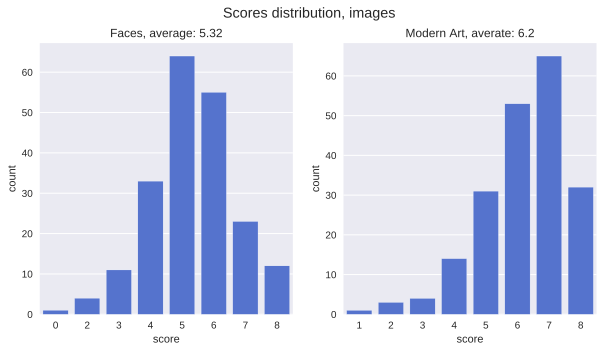

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'people_sum',
                     data = df_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Faces, average: ' + str(faces_average))

hist2 = sns.countplot(x = 'art_sum',
                     data = df_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Modern Art, averate: ' + str(art_average))

fig.suptitle("Scores distribution, images")
plt.show()

#### 9. Scores distribution, simple questions vs comparison questions

In [32]:
simple_average = np.round(np.sum(df_mapped['simple_sum'])/df_mapped.shape[0],2)
comparison_average = np.round(np.sum(df_mapped['comparison_sum'])/df_mapped.shape[0],2)

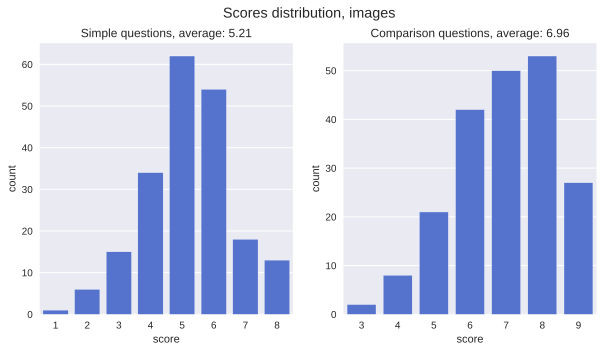

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'simple_sum',
                     data = df_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Simple questions, average: ' + str(simple_average))

hist2 = sns.countplot(x = 'comparison_sum',
                     data = df_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Comparison questions, average: ' + str(comparison_average))

fig.suptitle("Scores distribution, images")
plt.show()

#### 10. Question average score vs wisdom of the crowd

In [34]:
questions_average = np.sum(df_mapped[people_cols+art_cols], axis = 0)/df_mapped.shape[0]

In [35]:
questions_average = np.round(questions_average*100,2)

In [36]:
questions_average

q1     78.33
q2     34.98
q3     41.87
q4     64.53
q5     74.38
q6     79.31
q7     78.33
q8     80.30
q9     60.59
q10    88.67
q11    73.89
q12    78.33
q13    90.15
q14    61.08
q15    83.25
q16    84.24
dtype: float64

In [37]:
wc_to_invert = ['wc2', 'wc3', 'wc6', 'wc7', 'wc10', 'wc12', 'wc13', 'wc16']

In [38]:
#invert wisdom of the crowd columns when needed
df_mapped_inverted = df_mapped.copy()
df_mapped_inverted[wc_to_invert] = np.array([[1]*8]*df_mapped.shape[0]) - df_mapped[wc_to_invert]

In [39]:
wc_average = np.sum(df_mapped_inverted[wc_columns], axis = 0)/df_mapped.shape[0]
wc_average = np.round(wc_average*100,2)

In [40]:
wc_average

wc1     68.13
wc2     39.26
wc3     43.35
wc4     57.93
wc5     54.14
wc6     50.39
wc7     51.03
wc8     58.62
wc9     53.69
wc10    55.86
wc11    55.02
wc12    54.43
wc13    54.29
wc14    50.69
wc15    54.63
wc16    54.19
dtype: float64

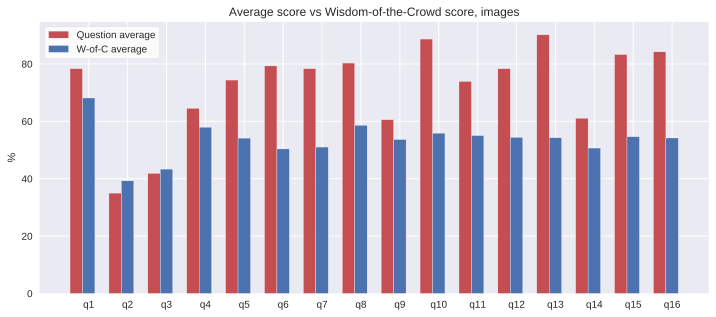

In [72]:
N = 16
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='r')
bars_wc = ax.bar(ind+width, wc_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(tuple(people_cols+art_cols))
ax.legend( (bars_q[0], bars_wc[0]), ('Question average', 'W-of-C average'), frameon=True, facecolor='white')

plt.title("Average score vs Wisdom-of-the-Crowd score, images")
plt.show()


#### 11. Score by knowledge of AI

In [53]:
df_know_ai = df_mapped[df_mapped['know_ai'] == 'Yes']
df_not_know_ai = df_mapped[df_mapped['know_ai'] == 'No']

In [64]:
ai_score_aver = np.round(np.sum(df_know_ai['score'])/df_know_ai.shape[0],2)
not_ai_score_aver = np.round(np.sum(df_not_know_ai['score'])/df_not_know_ai.shape[0],2)

In [65]:
ai_score_aver

11.57

In [66]:
not_ai_score_aver

11.51

In [57]:
know_ai_average = np.sum(df_know_ai[people_cols+art_cols], axis = 0)/df_know_ai.shape[0]
not_know_ai_average = np.sum(df_not_know_ai[people_cols+art_cols], axis = 0)/df_not_know_ai.shape[0]

In [59]:
know_ai_average = np.round(know_ai_average*100,2)
not_know_ai_average = np.round(not_know_ai_average*100,2)

In [60]:
know_ai_average

q1     75.47
q2     37.74
q3     47.17
q4     64.15
q5     75.47
q6     86.79
q7     79.25
q8     79.25
q9     49.06
q10    90.57
q11    71.70
q12    71.70
q13    84.91
q14    71.70
q15    86.79
q16    84.91
dtype: float64

In [61]:
not_know_ai_average

q1     79.33
q2     34.00
q3     40.00
q4     64.67
q5     74.00
q6     76.67
q7     78.00
q8     80.67
q9     64.67
q10    88.00
q11    74.67
q12    80.67
q13    92.00
q14    57.33
q15    82.00
q16    84.00
dtype: float64

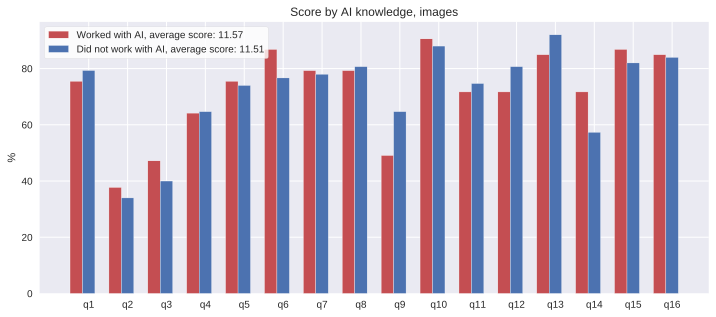

In [69]:
N = 16
ind = np.arange(N)  # the x locations for the groups
width = 0.32       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

know_ai_bars = ax.bar(ind, know_ai_average, width, color='r')
not_know_ai_bars = ax.bar(ind+width, not_know_ai_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(tuple(people_cols+art_cols))
ax.legend( (know_ai_bars[0], not_know_ai_bars[0]), ('Worked with AI, average score: ' + str(ai_score_aver), 
                                                    'Did not work with AI, average score: ' + str(not_ai_score_aver)),
          frameon=True, facecolor='white'
         )

plt.title("Score by AI knowledge, images")
plt.show()